In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


### 3.1 订单量预测

In [28]:
sales=df.groupby(['ds'])['订购数量'].sum().reset_index()
sales.rename(columns={'订购数量':'y'},inplace=True)
sales.head()

,ds,y
0,2016-08-01,2042
1,2016-09-01,1776
2,2016-10-01,1114
3,2016-11-01,3343
4,2016-12-01,1020


In [10]:
# 拟合模型
m=Prophet()# Prophet对象进行实例化来拟合模型，任何影响预测过程的设置都将在构造模型时被指定
m.fit(sales)# 利用fit() 代入历史数据集来拟合模型

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


In [11]:
# 构建待预测日期数据框，periods=90代表除历史数据的日期外再往后推90天
future=m.make_future_dataframe(periods=3,freq='M')
future.tail()

,ds
18,2018-02-01
19,2018-03-01
20,2018-03-31
21,2018-04-30
22,2018-05-31


In [20]:
# 预测数据集
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
# 预测日期，预测结果值，预测结果上下界

,ds,yhat,yhat_lower,yhat_upper
18,2018-02-01,1043.082090,237.689517,1836.703373
19,2018-03-01,997.820471,240.054406,1839.956377
20,2018-03-31,949.325878,89.976351,1776.795437
21,2018-04-30,900.831286,72.813283,1733.997608
22,2018-05-31,850.720207,27.633650,1711.474017


Text(0.5, 35.0, '时间')

<Figure size 360x360 with 0 Axes>

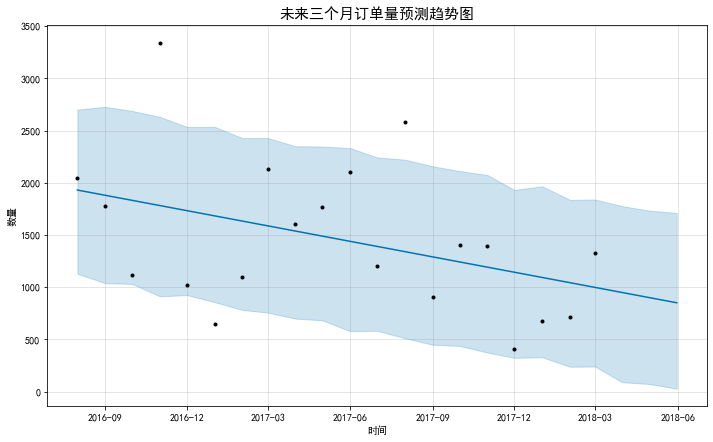

In [25]:
# 展示预测结果
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(5,5))
fig.set(alpha=0.2)
m.plot(forecast)
plt.title('未来三个月订单量预测趋势图',fontsize=15)
plt.ylabel('数量',fontsize=10)
plt.xlabel('时间',fontsize=10)

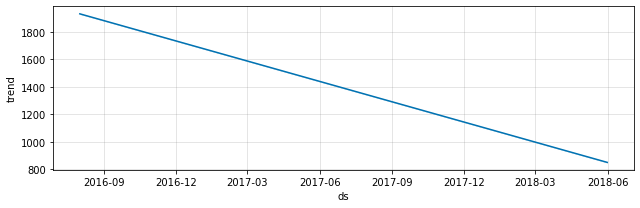

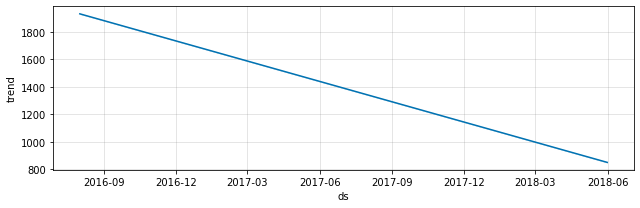

In [14]:
m.plot_components(forecast)

### 3.2  销售额预测

In [29]:
df0=pd.read_csv(r"data/orders.csv")
# df1=pd.read_csv(r'data/transactions.csv')
df1=pd.read_csv(r'data/orders_items.csv')
df=pd.merge(df0,df1,on='订单id',how='inner')
df['订单创建时间']=pd.to_datetime(df['订单创建时间'])
df['年']=df['订单创建时间'].dt.year
df['月']=df['订单创建时间'].dt.month
df['ds']=df['年'].map(str)+'-'+df['月'].map(str)
df['ds']=pd.to_datetime(df['ds'])
df=df.loc[df['支付状态']=='paid']

In [33]:
money=df.groupby(['ds'])['总售价'].sum().reset_index()
money.rename(columns={'总售价':'y'},inplace=True)

In [34]:
s=Prophet()# Prophet对象进行实例化来拟合模型，任何影响预测过程的设置都将在构造模型时被指定
s.fit(money)
future=s.make_future_dataframe(periods=3,freq='M')
forecast=s.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


,ds,yhat,yhat_lower,yhat_upper
18,2018-02-01,210057.395437,-57790.913604,481445.768729
19,2018-03-01,210190.192647,-29664.000151,459066.490739
20,2018-03-31,210332.475373,-54315.494975,449718.078525
21,2018-04-30,210474.758098,-47366.156052,450228.481500
22,2018-05-31,210621.783581,-48774.624559,467411.969873


Text(0.5, 35.0, '时间')

<Figure size 360x360 with 0 Axes>

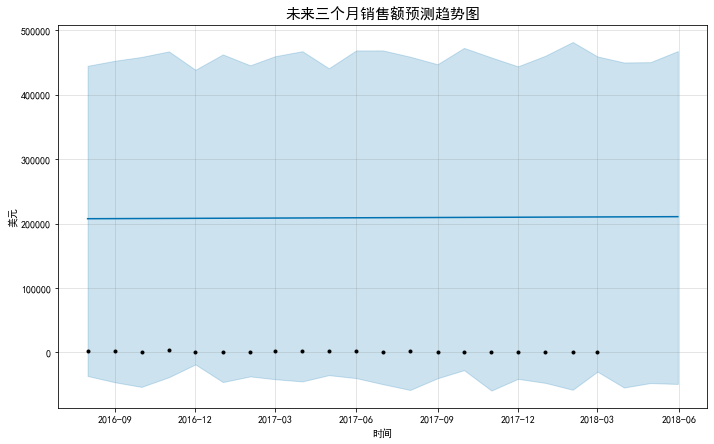

In [37]:
fig=plt.figure(figsize=(5,5))
fig.set(alpha=0.2)
m.plot(forecast)
plt.title('未来三个月销售额预测趋势图',fontsize=15)
plt.ylabel('美元',fontsize=10)
plt.xlabel('时间',fontsize=10)

In [27]:
#forecast1=forecast
#forecast1['ds']=forecast1['ds'].apply(lambda x: x.strftime('%Y-%m-%d'))
#from pyecharts import Line
#import time
#line=Line('未来三个月每日预测销售量')
#line.add('销售量',forecast1['ds'].tail(90).values,forecast1['yhat'].tail(90).values,xaxis_rotate=40)
#line.render(path=r'KPI/predict/未来三个月每天的销售量.html')
#line